# Lorenzo Pastore - Big Data in GIS (Task 4)
Matricola: 847212

- Plot the average anomaly (difference) for [psl] or [ts] variable, between the periods 1950-2000 and 1900-1950 (free choice of the model).

In [1]:
# Libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import cartopy.crs as ccrs
import xarray as xr
import pandas as pd
import ipywidgets as widgets
from ipywidgets import Layout

In [2]:
# Chose models
model = 'MRI-ESM2-0'

#- Path to file
modfile0=''.join(['./psl_Amon_',model,'_historical_r1i1p1f1_gn_185001-201412.nc'])

#- explore file
ds0 = xr.open_dataset(modfile0)

#- extract variable (psl) - temporary variable
psl0 = ds0.psl/100
#print(ds0)

psl0.coords['lon'] = (psl0.coords['lon'] + 180) % 360 - 180
psl0 = psl0.sortby(psl0.lon)

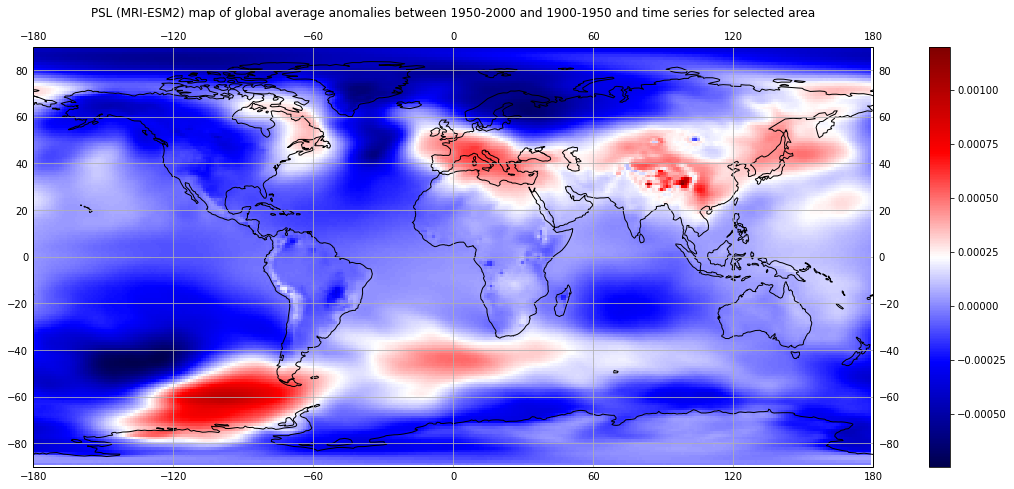

interactive(children=(IntRangeSlider(value=(-90, 90), description='Latitude:', layout=Layout(height='auto', wi…

<function __main__.selecting_region(lati=(-90, 90), long=(-180, 180))>

In [14]:
# Prepare to display to check things
plt.rcParams['figure.figsize'] = [20,5] # width, height
fig = plt.figure(figsize=(20,17))
grid = plt.GridSpec(2,1)

cmap = mpl.cm.seismic

psl_1950_2000 = psl0.sel(time=slice("1950-01","1999-12"))
psl_1900_1950 = psl0.sel(time=slice("1900-01","1949-12"))

intdiff = (psl_1950_2000.mean(axis=0)-psl_1900_1950.mean(axis=0))/psl_1900_1950.mean(axis=0)   # relative difference

ax = fig.add_subplot(grid[0,:], projection=ccrs.PlateCarree())
ax.set_title('PSL (MRI-ESM2) map of global average anomalies between 1950-2000 and 1900-1950 and time series for selected area',pad=30)
ax.set_global()
mm = ax.pcolormesh(intdiff.lon, intdiff.lat, intdiff, transform=ccrs.PlateCarree(),cmap=cmap)  
ax.coastlines()
ax.gridlines(draw_labels=True)
fig.colorbar(mm, ax=ax)

# Dimostrazione interattiva 
def selecting_region(lati=(-90,90), long=(-180,180)):
    #- focus on the region of interest 
    lat1,lat2 = lati
    lon1,lon2 = long
    psl1_nat = psl0.sel(lat=slice(lat1,lat2), lon=slice(lon1,lon2))
    psl_nat = psl1_nat

#- Selecting the two periods
    psltser = (psl_nat.groupby('time.year').mean(dim=('time','lon','lat')))
    psl50_00 = psltser.loc['1950':'2000']
    psl00_50 = psltser.loc['1900':'1950']

    #- Converting into dataframe
    psl_0 = pd.DataFrame(psl50_00)
    psl_1 = pd.DataFrame(psl00_50)

    #- Compute anomalies
    anom = psl_0-psl_1

    #- Plotting the series
    ser = fig.add_subplot()
    plt.plot(anom,color='green',linewidth=1)
    
lat_slider = widgets.IntRangeSlider(value=[-90,90],min=-90,max=90,step=1,description='Latitude:',
                                    layout=Layout(width='auto', height='auto'))
lon_slider = widgets.IntRangeSlider(value=[-180,180],min=-180,max=180,step=1,description='Longitude:',
                                    layout=Layout(width='auto', height='auto'))
widgets.interact(selecting_region, lati=lat_slider,long=lon_slider)
